In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading in necessary dataset
data_classes=pd.read_csv('/content/drive/MyDrive/MATH 642 Final Project/Data/full_dataset_labeled.csv')

In [5]:
from sklearn.preprocessing import StandardScaler
#Scaling data before PCA
scaler1=StandardScaler()
scaled_data_classes=scaler1.fit_transform(data_classes.drop(columns=['Player_Name','class_rd']))

#Trying random forest classifier with PCA
from sklearn.decomposition import PCA
#Finding components that preserve 82% of the variance in the original dataset
pca=PCA(.82)

#Projecting the data onto these components
PCA_Mat=pca.fit_transform(scaled_data_classes)

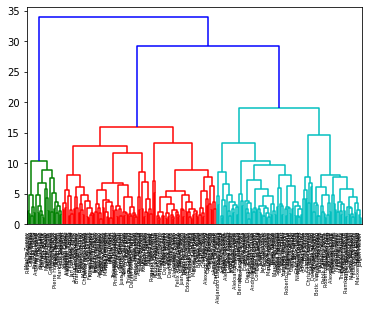

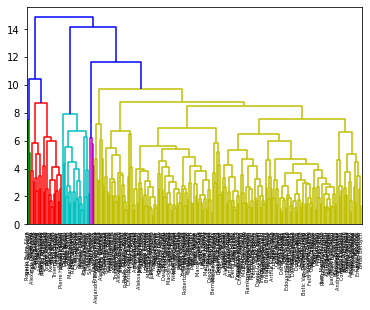

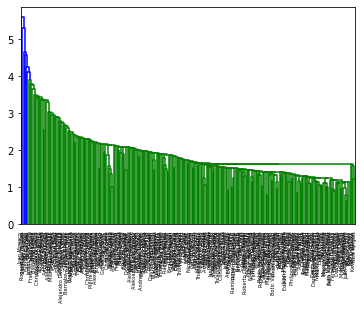

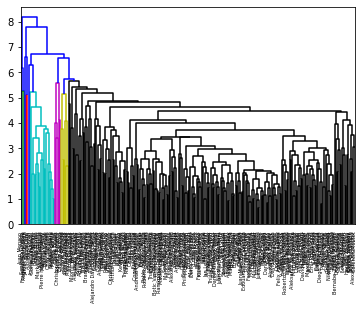

In [15]:
#Making Hierarchical clustering dendrograms using multiple linakge methods
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
Z=[]
dn=[]
for i in enumerate(['ward','complete','single','average']):
  Z.append(linkage(PCA_Mat,i[1]))
  dn.append(dendrogram(Z[i[0]],labels=data_classes['Player_Name'].to_numpy()))
  plt.show()

In [17]:
#It looks like the ward linkage method gave the best results, so we will cut the tree with ward linkage at 20
from scipy.cluster.hierarchy import cut_tree
complete_clusters=cut_tree(Z[0],height=20)

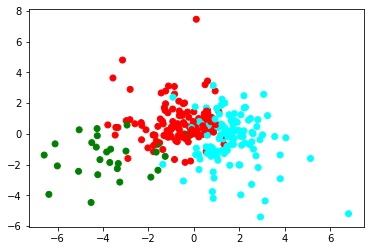

In [18]:
#Creating DF with Unsupervised
clusters=pd.DataFrame()
clusters['Player_Name']=data_classes['Player_Name']
clusters['Group']=complete_clusters

#Creating a scatterplot of points colored by group and projected onto the first two principal components
colors={2:'green',1:'red',0:'cyan'}
plt.scatter(PCA_Mat[:,0],PCA_Mat[:,1],c=clusters['Group'].map(colors))
plt.show()

In [19]:
#Creating DF with Unsupervised
clusters=pd.DataFrame()
clusters['Player_Name']=data_classes['Player_Name']
clusters['Group']=complete_clusters

In [27]:
#Doing some exploration
#Daniel Nester, Dustin Brown, Mischa Zverev, and Maxime Cressy are all very aggressive players and come to the net 
#often. It would be nice if our clustering algorithm classified them into the same groups. This would show that there 
#is some inherent structure in the data (very aggressive players have different match statistics than others)

clusters.loc[clusters['Player_Name'].isin(['Daniel Nestor','Maxime Cressy','Dustin Brown','Mischa Zverev'])]

,Player_Name,Group
70,Daniel Nestor,2
84,Dustin Brown,2
166,Maxime Cressy,2
173,Mischa Zverev,2


In [ ]:
#We can see that the structure we were hoping for is there. Some of the most aggressive players that we hoped would 
#be grouped together were actually grouped together!